In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [238]:
df = pd.read_csv('../experiments/sw-data/AMD_Ryzen_7_5800X.csv')

df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
display(df)


,framework,api,allocated,max_values,num_jsons,bytes_in,bytes_out,time,throughput
0,simdjson,DOM,False,1,7271551,134217732,58172400,0.276213,4.859211e+08
1,simdjson,DOM,True,1,7271551,134217732,58172400,0.255701,5.249011e+08
2,simdjson,DOM (no keys),True,1,7271551,134217732,58172400,0.244581,5.487660e+08
3,RapidJSON,DOM,False,1,7271551,134217732,58172400,0.620397,2.163417e+08
4,RapidJSON,DOM (in situ),False,1,7271551,134217732,58172400,0.562609,2.385631e+08
...,...,...,...,...,...,...,...,...,...
127,Custom,NaN,True,1024,58608,134219966,239393824,0.162281,8.270837e+08
128,Custom,NaN,False,1024,58608,134219966,239393824,0.170138,7.888888e+08
129,Custom,NaN,False,1024,58608,134219966,239393824,0.177721,7.552285e+08
130,ANTLR4,NaN,False,1024,58608,134219966,239393824,15.655500,8.573343e+06


In [245]:
dg = df.groupby(['framework', 'max_values', 'bytes_in', 'bytes_out']).agg({'throughput':'max'})
dg.sort_values(by=['framework', 'max_values'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']
display(dg)


Throughput (GB/s)
framework       max_values bytes_in  bytes_out                   
ANTLR4          1          134217732 58172400            0.011172
                2          134217732 58172400            0.012617
                4          134217749 93889032            0.010389
                8          134217732 135139672           0.009511
                16         134217772 173107312           0.009190
                32         134217763 201371568           0.008882
                64         134217865 219345808           0.008708
                128        134217796 229598248           0.008628
                256        134218107 235095984           0.008586
                512        134218849 237941632           0.008616
                1024       134219966 239393824           0.008573
Boost Spirit.X3 1          134217732 58172400            0.851846
                2          134217732 58172400            0.850362
                4          134217749 93889032            0.653538
                8          134217732 135139672           0.550470
                16         134217772 173107312           0.499850
                32         134217763 201371568           0.465890
                64         134217865 219345808           0.448724
                128        134217796 229598248           0.442356
                256        134218107 235095984           0.442589
                512        134218849 237941632           0.439958
                1024       134219966 239393824           0.436991
Custom          1          134217732 58172400            2.321576
                2          134217732 58172400            3.056196
                4          134217749 93889032            1.576441
                8          134217732 135139672           1.202065
                16         134217772 173107312           1.018190
                32         134217763 201371568           0.930620
                64         134217865 219345808           0.877826
                128        134217796 229598248           0.850174
                256        134218107 235095984           0.837685
                512        134218849 237941632           0.831390
                1024       134219966 239393824           0.827084
RapidJSON       1          134217732 58172400            0.526224
                2          134217732 58172400            0.562016
                4          134217749 93889032            0.484462
                8          134217732 135139672           0.466202
                16         134217772 173107312           0.464806
                32         134217763 201371568           0.465205
                64         134217865 219345808           0.466777
                128        134217796 229598248           0.467043
                256        134218107 235095984           0.467509
                512        134218849 237941632           0.467490
                1024       134219966 239393824           0.466950
simdjson        1          134217732 58172400            0.548766
                2          134217732 58172400            0.690961
                4          134217749 93889032            0.567349
                8          134217732 135139672           0.504458
                16         134217772 173107312           0.481221
                32         134217763 201371568           0.466653
                64         134217865 219345808           0.463610
                128        134217796 229598248           0.463056
                256        134218107 235095984           0.461853
                512        134218849 237941632           0.460844
                1024       134219966 239393824           0.457640

In [325]:
dh = dg.unstack('framework')
dh.index.rename(inplace=True, names=['Max. values', 'Bytes in', 'Bytes out'])
dh = dh.droplevel(0, axis=1)
display(dh)

,,framework,ANTLR4,Boost Spirit.X3,Custom,RapidJSON,simdjson
Max. values,Bytes in,Bytes out,,,,,
1,134217732,58172400,0.011172,0.851846,2.321576,0.526224,0.548766
2,134217732,58172400,0.012617,0.850362,3.056196,0.562016,0.690961
4,134217749,93889032,0.010389,0.653538,1.576441,0.484462,0.567349
8,134217732,135139672,0.009511,0.550470,1.202065,0.466202,0.504458
16,134217772,173107312,0.009190,0.499850,1.018190,0.464806,0.481221
32,134217763,201371568,0.008882,0.465890,0.930620,0.465205,0.466653
64,134217865,219345808,0.008708,0.448724,0.877826,0.466777,0.463610
128,134217796,229598248,0.008628,0.442356,0.850174,0.467043,0.463056
256,134218107,235095984,0.008586,0.442589,0.837685,0.467509,0.461853


Text(0, 0.5, 'Max. number of values.')

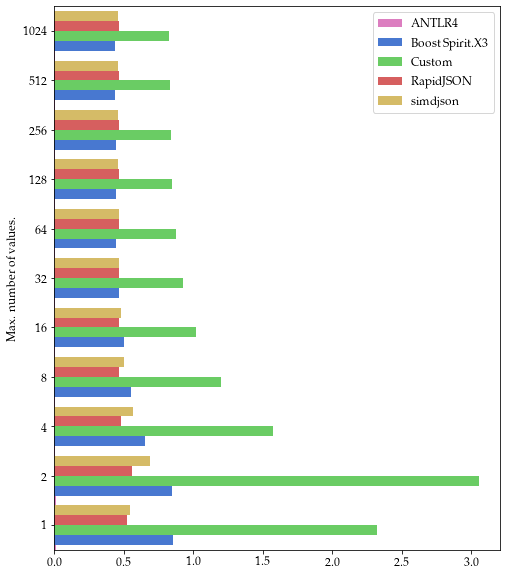

In [338]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

#dh.columns.rename(inplace=True, name='Framework')
#dh.index.rename(inplace=True, name='Max. values')

fig, ax = plt.subplots(figsize=(8, 10))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']

y_labels = [x[0] for x in dh.index.to_list()]
y_ticks = np.arange(0, len(y_labels))

impls = dh.columns.to_list()
bars = []

for i, impl in enumerate(impls):
    x = dh[impl].to_numpy()
    y = np.arange(0, len(x))

    b = ax.barh(y=y+(i/len(impls)), width=x, height=1/len(impls), color=colors[i])
    bars.append(b)

ax.set_ylim(0, len(y_labels))

ax.legend(bars, impls)
ax.set_yticks(y_ticks+0.5)
ax.set_yticklabels(y_labels)
ax.set_ylabel("Max. number of values.")